In [1]:
import pandas 
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import (Conv2D, Dense, MaxPool2D, GlobalMaxPool2D,
                                     AveragePooling2D, Input, Flatten, Dropout)
import tensorflow.keras as keras
from tensorflow import executing_eagerly
from tensorflow.compat.v1 import disable_eager_execution
# this way I do not have to reshape the data
keras.backend.set_image_data_format('channels_first')
assert keras.backend.image_data_format() == 'channels_first'

In [3]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from tensorflow.keras.utils import plot_model
# from tensorflow.keras.applications.efficientnet import EfficientNetB7, preprocess_input
# Import mlcompute module to use the optional set_mlc_device API for device selection with ML Compute.
from tensorflow.python.compiler.mlcompute import mlcompute

In [4]:
# Select CPU device.
mlcompute.set_mlc_device(device_name='gpu') # Available options are 'cpu', 'gpu', and 'any'.
disable_eager_execution()

# Test final model

## Already seen data

Questa roba è sbagliata. Dovrei usare dati da un altro anno, ma volevo giusto provare.

In [7]:
data_paths = ['./data.nosync/train_pos.h5', './data.nosync/train_neg.h5']
#     in the final run, it should be called either 'positive' or 'negative'
#     depending on which of the two classes I select
train_ar = np.vstack((np.array(h5py.File(data_paths[0])['test'][:100]),
                      np.array(h5py.File(data_paths[1])['test'][:100])))
# class_ar = np.append(
#     np.zeros(h5py.File(data_paths[0])['test'].shape[0]) + 1,
#     np.zeros(h5py.File(data_paths[1])['test'].shape[0]))
# x_train, x_test, y_train, y_test = train_test_split(train_ar[:1000,9:12,:,:],
#                                                     class_ar[:1000],
#                                                     shuffle=True,
#                                                     test_size=.9)
# del train_ar

In [8]:
class_ar = np.append(
    np.zeros(100) + 1,
    np.zeros(100))

In [12]:
x_test, y_test = train_ar[:,9:12,:,:], class_ar

In [13]:
INPUT = (3,120,120)
new_input = Input(shape=INPUT)
VGG_model = VGG16(include_top=False, input_tensor=new_input)
base_model = Model(inputs = VGG_model.input, outputs = VGG_model.layers[15].output)

In [14]:
new_x_test = base_model.predict(preprocess_input(x_test))

/Users/leonardoalchieri/anaconda3/envs/tf_apple_2/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [15]:
single_model = keras.models.load_model('main_model_2')

In [26]:
print("Bias-test accuracy %.2f %%" %(single_model.evaluate(new_x_test, y_test)[1]*100))

Bias-test accuracy 93.50 %


In [30]:
(single_model.predict(new_x_test) + 0.5).astype('int')

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [44]:
FAILS = x_test[(single_model.predict(new_x_test) + 0.5).astype('int').reshape(len(y_test)) != y_test]
CLASS_FAILS = y_test[(single_model.predict(new_x_test) + 0.5).astype('int').reshape(len(y_test)) != y_test]

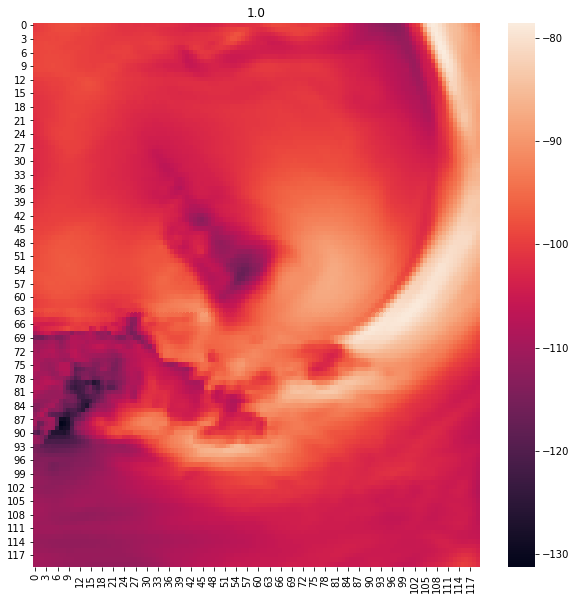

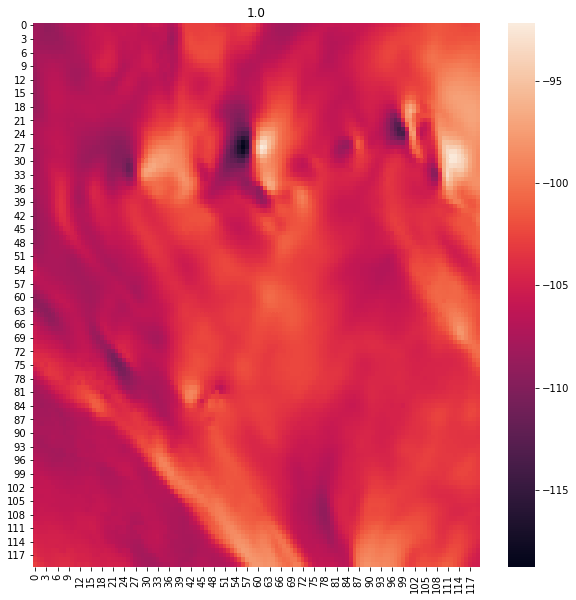

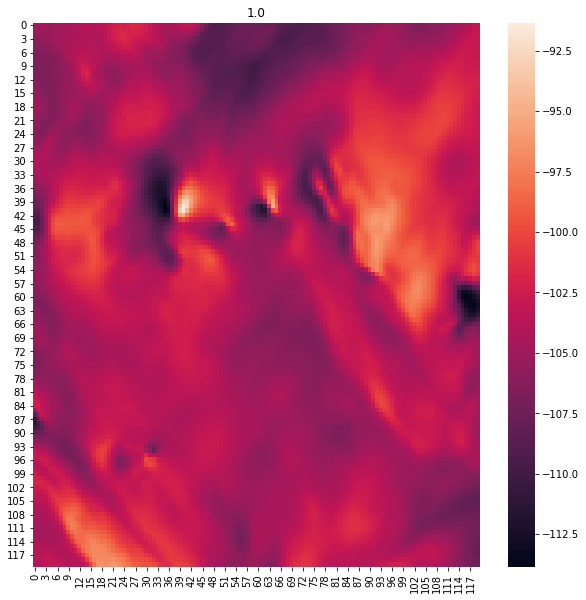

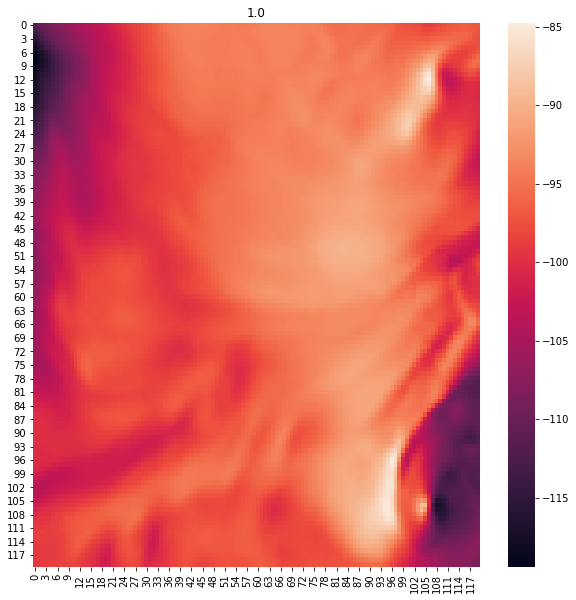

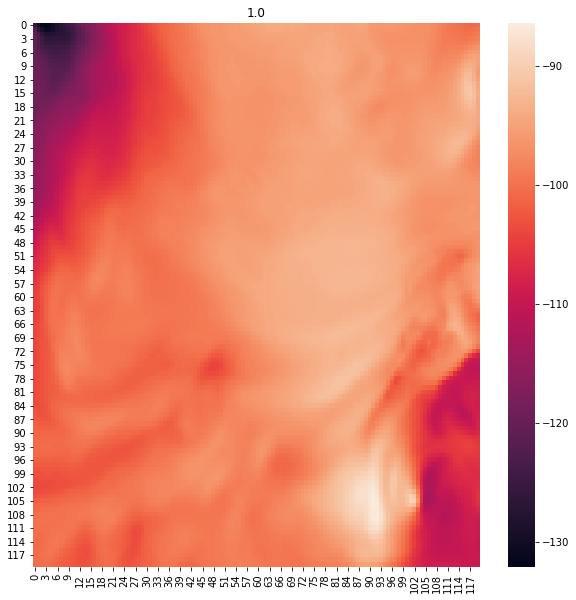

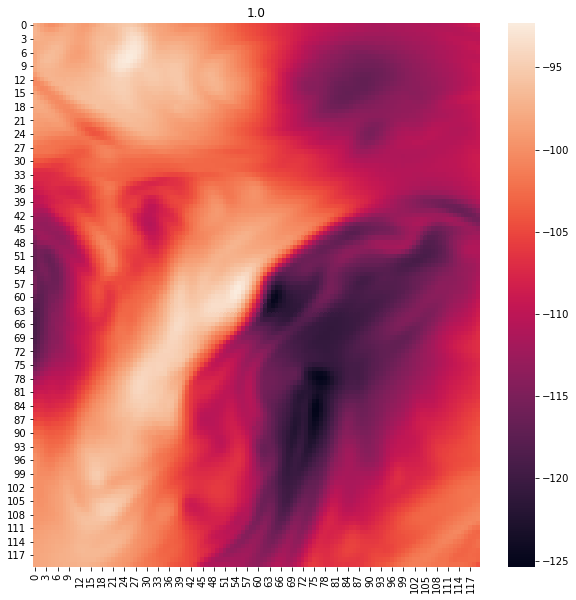

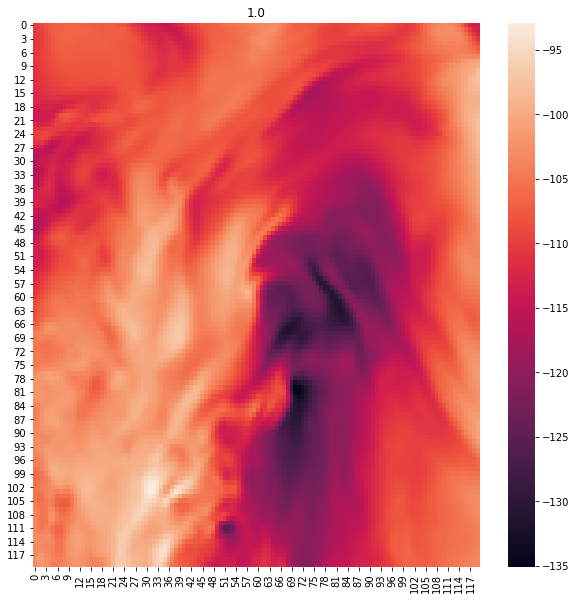

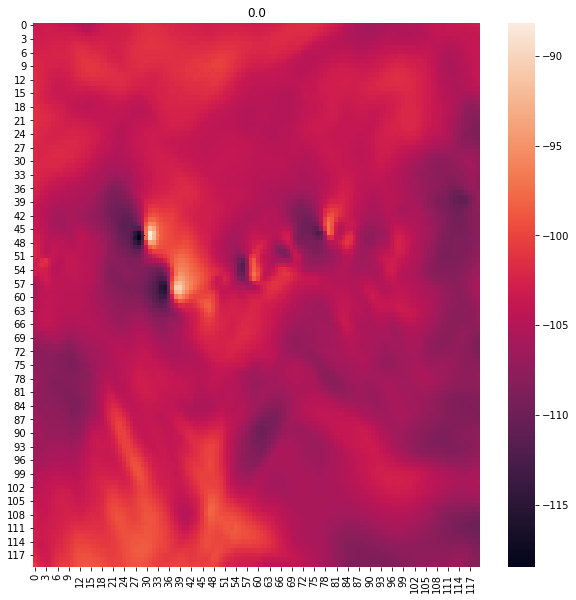

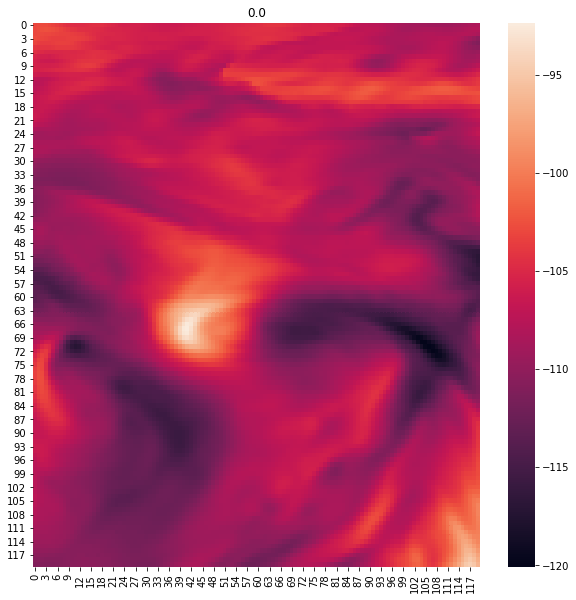

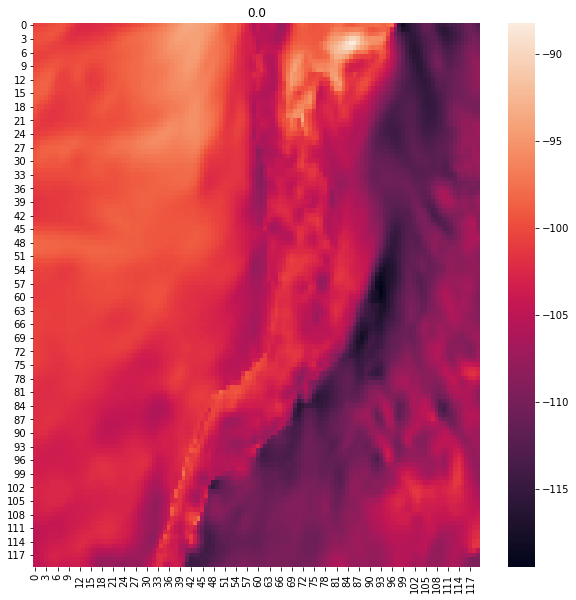

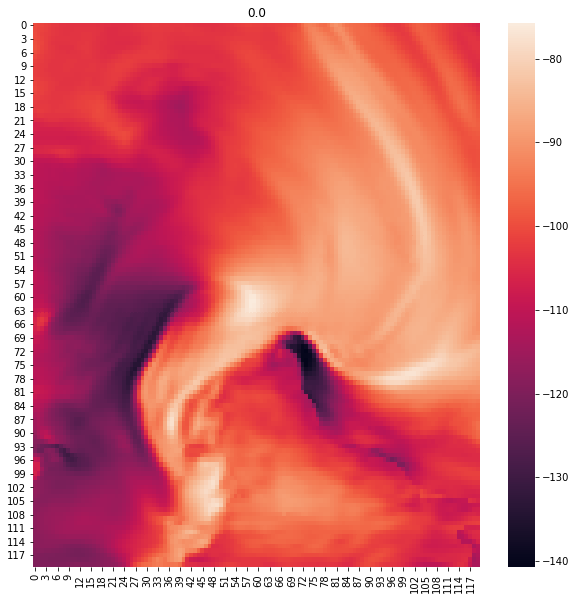

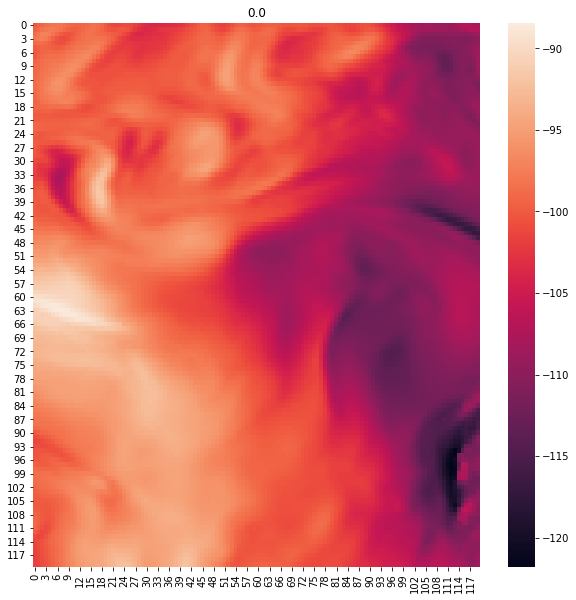

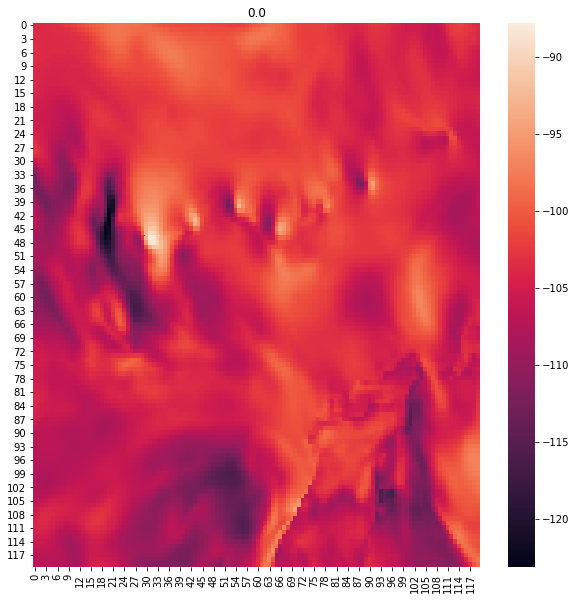

In [48]:
for row, el_class in zip(FAILS, CLASS_FAILS):
    plt.figure(figsize = (10,10))
    sns.heatmap(row[2,:,:])
    plt.title(el_class)
    plt.show()

## Different year